In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import warnings

from datetime import datetime

In [84]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

d_code = pd.read_csv('속성_D_코드.csv',index_col=0).T.to_dict()
h_code= pd.read_csv('속성_H_코드.csv',index_col=0).T.to_dict()
l_code= pd.read_csv('속성_L_코드.csv',index_col=0).T.to_dict()

In [85]:
train.shape, test.shape

((501951, 35), (46404, 34))

In [86]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [87]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,...,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,...,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,...,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,...,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,...,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


In [88]:
def add_code(df, d_code, h_code, l_code):
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_u'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 상위코드'])
    df['person_prefer_h_2_u'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 상위코드'])
    df['person_prefer_h_3_u'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 상위코드'])
    df['contents_attribute_h_u'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 상위코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    return df

train = add_code(train, d_code, h_code, l_code)
test = add_code(test, d_code, h_code, l_code)
print("train.shape: ", train.shape)
print("test.shape: ", test.shape)

train.shape:  (501951, 59)
test.shape:  (46404, 58)


In [89]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_u,person_prefer_h_2_u,person_prefer_h_3_u,contents_attribute_h_u,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,...,274.0,216.0,3,94,58,94,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,...,274.0,216.0,94,94,94,94,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,...,91.0,1.0,48,250,48,48,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,...,274.0,216.0,71,226,1,71,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,...,274.0,216.0,208,208,208,71,1607,1606,1605,2016


In [90]:
def preprocessing_contents_open_dt(data):
    data['contents_open_dt'] = data['contents_open_dt'].astype('str')
    DATE = data['contents_open_dt'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    
    DATE = pd.DataFrame(DATE)
    DATE = DATE.rename(columns = {'contents_open_dt': 'date'})
    
    DATE['Y'] = DATE['date'].apply(lambda x: x.timetuple()[0])
    DATE['M'] = DATE['date'].apply(lambda x: x.timetuple()[1])
    DATE['D'] = DATE['date'].apply(lambda x: x.timetuple()[2])
    DATE['id'] = data['id']
    
    data = data.merge(DATE, on = 'id', how = 'left')
    data = data.drop(columns = ['date', 'contents_open_dt'])
    return data

train = preprocessing_contents_open_dt(train)
test = preprocessing_contents_open_dt(test)

# 안전하게 확인하고 넘어 갑시다. 
train_labels = train['target']
train, test = train.align(test, join = 'inner', axis = 1)
train['target'] = train_labels
print("train_data.shape: ", train.shape)
print("test_data.shape: ", test.shape)

train_data.shape:  (501951, 61)
test_data.shape:  (46404, 60)


In [91]:
plt.style.use('fivethirtyeight')
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

In [95]:
job= train.copy()
job_test = test.copy()

0    251106
1    250845
Name: target, dtype: int64


<AxesSubplot:title={'center':'Distribution of target'}, ylabel='Frequency'>

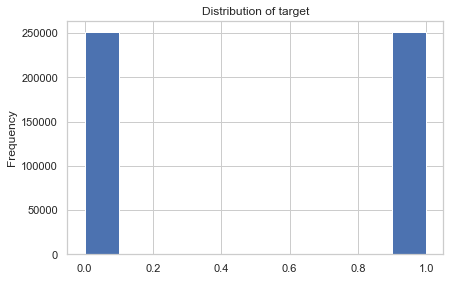

In [96]:
print(job['target'].value_counts())
job['target'].plot.hist(title='Distribution of target')

데이터 결측치값:
False    61
Name: val_mis_bool, dtype: int64


<AxesSubplot:title={'center':'Distribution of missing values'}, ylabel='Frequency'>

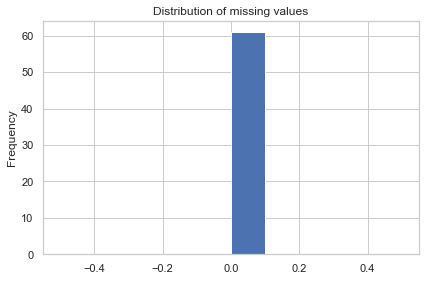

In [99]:
val_mis = job.isnull().sum()
val_mis_bool = val_mis>=1

val_mis_df=pd.concat([val_mis, val_mis_bool], axis=1)
val_mis_df= val_mis_df.rename(columns ={0:'val_mis', 1:'val_mis_bool'})

print('데이터 결측치값:')
print(val_mis_df['val_mis_bool'].value_counts())

val_mis_df['val_mis_bool'].astype(int).plot.hist(title = 'Distribution of missing values')

In [100]:
job.dtypes.value_counts()

int64      39
float64    16
bool        6
dtype: int64

In [101]:
job.select_dtypes('int64').apply(pd.Series.nunique, axis=0)

id                        501951
person_attribute_a             2
person_attribute_a_1           8
person_attribute_b             6
person_prefer_c                5
person_prefer_d_1           1093
person_prefer_d_2           1081
person_prefer_d_3           1043
person_prefer_e               12
person_prefer_f                1
person_prefer_g                1
person_prefer_h_1            279
person_prefer_h_2            279
person_prefer_h_3            279
contents_attribute_i           3
contents_attribute_a           3
contents_attribute_j_1         9
contents_attribute_j           2
contents_attribute_c           4
contents_attribute_k           2
contents_attribute_l        1752
contents_attribute_d        1065
contents_attribute_m           5
contents_attribute_e          12
contents_attribute_h         250
person_rn                 300177
contents_rn               283359
person_prefer_h_1_u           19
person_prefer_h_2_u           19
person_prefer_h_3_u           19
contents_a

In [102]:
job.select_dtypes('float64').apply(pd.Series.nunique, axis=0)

person_prefer_d_1_n       443
person_prefer_d_1_s        36
person_prefer_d_1_m       137
person_prefer_d_1_l        11
person_prefer_d_2_n       435
person_prefer_d_2_s        36
person_prefer_d_2_m       137
person_prefer_d_2_l        11
person_prefer_d_3_n       420
person_prefer_d_3_s        36
person_prefer_d_3_m       136
person_prefer_d_3_l        11
contents_attribute_d_n    431
contents_attribute_d_s     36
contents_attribute_d_m    137
contents_attribute_d_l     11
dtype: int64

In [110]:
index= job.select_dtypes('float64').apply(pd.Series.nunique,axis=0).index
values= job.select_dtypes('float64').apply(pd.Series.nunique, axis=0).values
pd.crosstab(index, values, margins =True).style.background_gradient(cmap='Reds')

col_0,11,36,136,137,420,431,435,443,All
row_0,,,,,,,,,
contents_attribute_d_l,1,0,0,0,0,0,0,0,1
contents_attribute_d_m,0,0,0,1,0,0,0,0,1
contents_attribute_d_n,0,0,0,0,0,1,0,0,1
contents_attribute_d_s,0,1,0,0,0,0,0,0,1
person_prefer_d_1_l,1,0,0,0,0,0,0,0,1
person_prefer_d_1_m,0,0,0,1,0,0,0,0,1
person_prefer_d_1_n,0,0,0,0,0,0,0,1,1
person_prefer_d_1_s,0,1,0,0,0,0,0,0,1
person_prefer_d_2_l,1,0,0,0,0,0,0,0,1


<AxesSubplot:title={'center':'person_attribute_a'}>

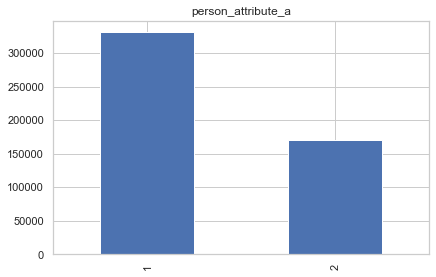

In [111]:
job['person_attribute_a'].value_counts().plot.bar(title ='person_attribute_a')

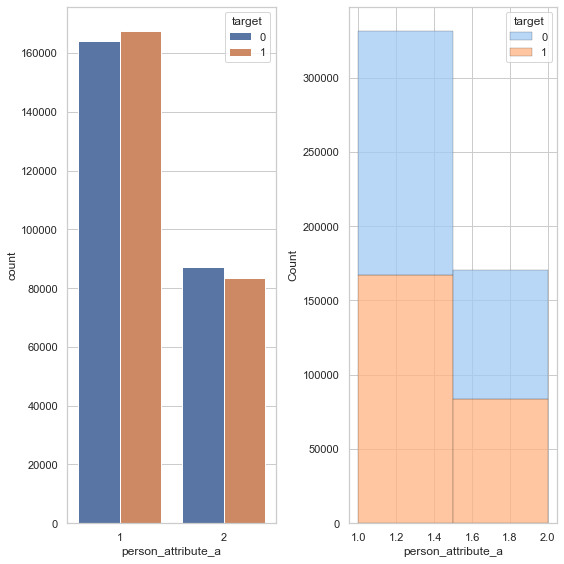

In [115]:
f, ax = plt.subplots(1,2, figsize=(8,8))

x='person_attribute_a'
y='target'

sns.countplot('person_attribute_a', hue='target', data=job, ax=ax[0])

sns.histplot(job,
    x ='person_attribute_a',
    hue='target',
    multiple='stack',
    palette='pastel',
    edgecolor='.10',
    linewidth='.20',
    bins=2,
    ax=ax[1])

plt.tight_layout(h_pad =2.5)

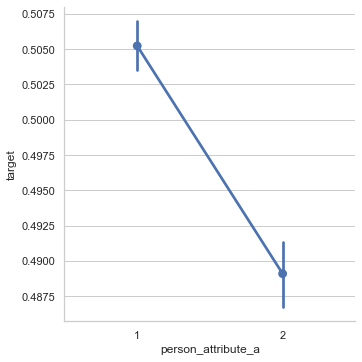

In [116]:
sns.factorplot(x,y,data=job)

person_attribute_a_1:
0    158626
1     61195
5     57783
2     51895
6     49820
3     46340
4     44325
7     31967
Name: person_attribute_a_1, dtype: int64


<AxesSubplot:xlabel='person_attribute_a_1', ylabel='count'>

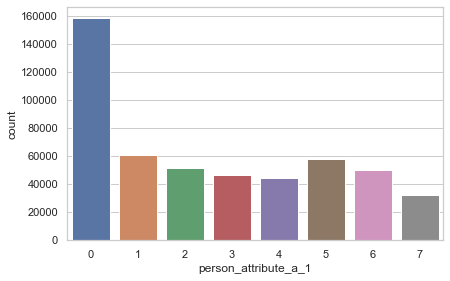

In [117]:
print('person_attribute_a_1:')
print(job['person_attribute_a_1'].value_counts())

sns.countplot('person_attribute_a_1', data=job)

In [118]:
value = job['person_attribute_a_1'].value_counts()
value_percent=job['person_attribute_a_1'].value_counts()/len(job) *100

value_table=pd.concat([value, value_percent], axis=1)
value_table.columns =['number of value', '% of total value']

value_table

,number of value,% of total value
0,158626,31.601889
1,61195,12.191429
5,57783,11.511681
2,51895,10.338659
6,49820,9.925272
3,46340,9.231977
4,44325,8.830543
7,31967,6.368550


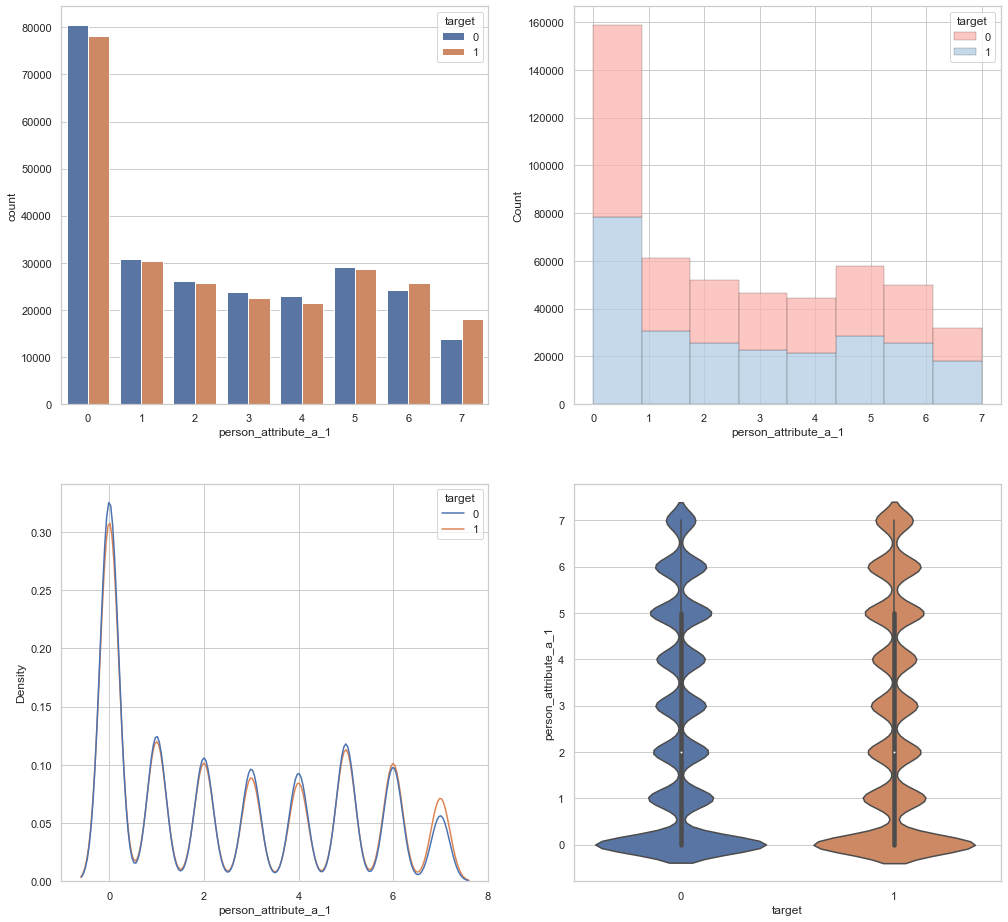

In [119]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot('person_attribute_a_1', hue = 'target', data =job, ax=ax[0][0])
sns.histplot(job,
            x = "person_attribute_a_1",
            hue="target",
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 8,
            ax = ax[0][1])
sns.kdeplot(data=job, x="person_attribute_a_1", hue='target', ax=ax[1][0])
sns.violinplot(data=job, x="target", y="person_attribute_a_1", ax=ax[1][1])
plt.show()

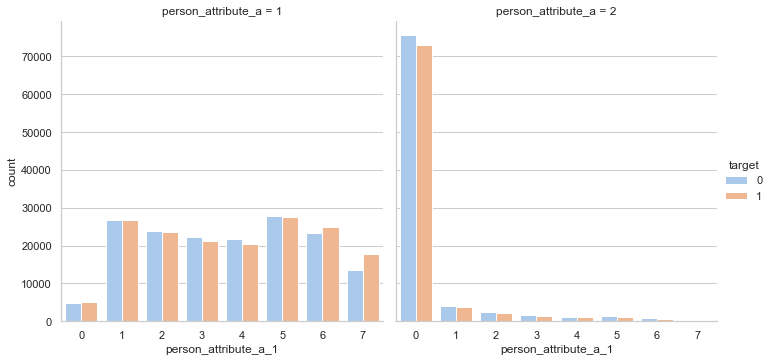

In [120]:
sns.catplot('person_attribute_a_1',col = 'person_attribute_a', 
            hue = 'target', kind='count', palette='pastel', 
            data =job)

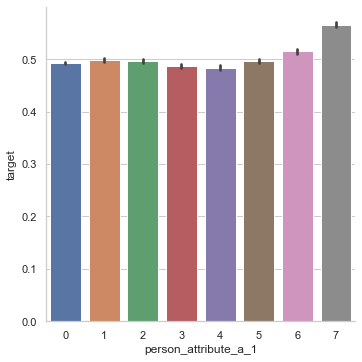

In [121]:
sns.catplot(x="person_attribute_a_1", y="target", kind="bar", data=job)

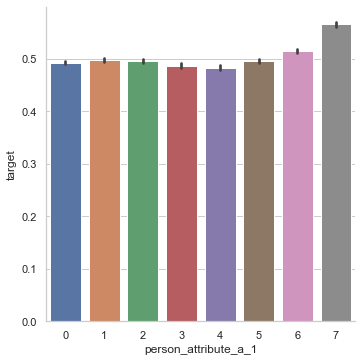

In [122]:
sns.catplot(x="person_attribute_a_1", y="target", kind="bar", data=job)

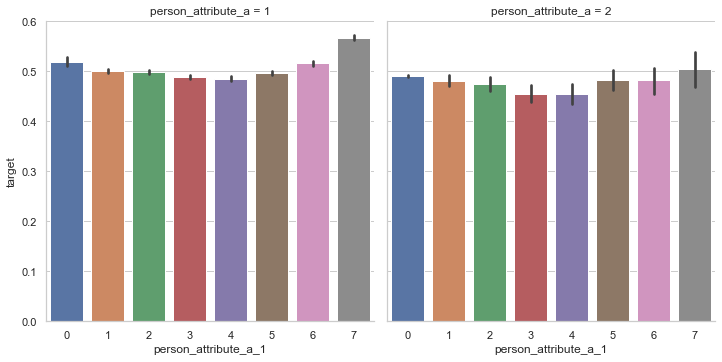

In [123]:
sns.catplot(x="person_attribute_a_1", y="target", col = "person_attribute_a" , kind="bar", data=job)

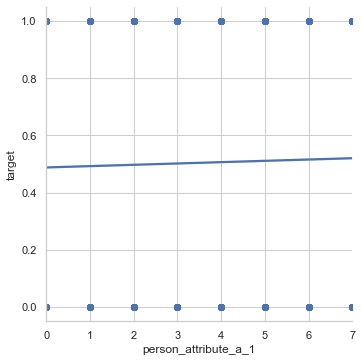

In [124]:
sns.lmplot(x = 'person_attribute_a_1', y = 'target', data = job)

In [127]:
pd.crosstab(job.person_attribute_a_1,job.target,margins=True).style.background_gradient(cmap='hot')

target,0,1,All
person_attribute_a_1,,,
0,80423,78203,158626
1,30739,30456,61195
2,26135,25760,51895
3,23779,22561,46340
4,22889,21436,44325
5,29101,28682,57783
6,24159,25661,49820
7,13881,18086,31967
All,251106,250845,501951
